In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import pickle
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix, plot_confusion_matrix

In [4]:
data_train_raw = pd.read_csv('./data/data_train_raw.csv').drop('Unnamed: 0', axis = 1)
data_train_raw

,label,text
0,__label__Du_lich,"Theo hành trình tour du lịch Mỹ - Bờ Đông, du ..."
1,__label__Nha_dat,mình cần tìm 1 phòng cho khoảng 3 người quanh ...
2,__label__Nha_dat,Cho thuê nhà riêng dt 60m/sàn. Có 4 phòng ngủ....
3,__label__Nha_dat,"Cho thuê nhà ở tầng 4 khép kín, 4/295 Nguyễn K..."
4,__label__Mua_sam,► Crumpler jackpack full photo ► giá : 800.000...
...,...,...
15995,__label__Do_an_va_do_uong,CÁC MÓN KIM CHI NGON CHO MÙA THU -------------...
15996,__label__Nha_dat,Cần cho thuê Chung cư Greenstar 234 Phạm Văn Đ...
15997,__label__Kinh_doanh_va_Cong_nghiep,CHƯƠNG TRÌNH HỌC PHÍ THÁNG 08/2016 TẶNG NGAY K...
15998,__label__Nha_va_vuon,Bố trí thông minh giúp nhà ống Sài Gòn không c...


In [5]:
data_train_raw.groupby('label').count().sort_values('text')

,text
label,
__label__Cong_nghe_moi,33
__label__The_thao,76
__label__Giao_thong,108
__label__Phap_luat,131
__label__Thoi_quen_va_so_thich,160
__label__Khoa_hoc,160
__label__Suc_khoe_va_benh_tat,194
__label__May_tinh_va_thiet_bi_dien_tu,202
__label__Giai_tri,211


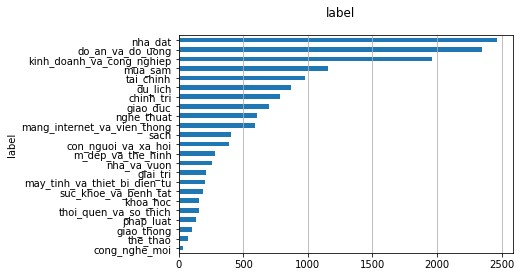

In [48]:
fig, ax = plt.subplots()
fig.suptitle("label", fontsize=12)
df["label"].reset_index().groupby("label").count().sort_values(by= 
       "index").plot(kind="barh", legend=False, 
        ax=ax).grid(axis='x')
plt.show()

In [6]:
data_train_raw.nunique()

label       23
text     15178
dtype: int64

### Test oà uý, điều hoà

In [7]:
data_train_raw[data_train_raw.text.str.contains("điều hoà")].count()

label    341
text     341
dtype: int64

In [8]:
data_train_raw[data_train_raw.text.str.contains("điều hòa")].count()

label    389
text     389
dtype: int64

In [9]:
data_train_raw[data_train_raw.text.str.contains("ùy")].count()

label    665
text     665
dtype: int64

## Run model not preprocessing

In [1]:
from sklearn.model_selection import train_test_split

In [10]:
test_percent = 0.2
X_train, X_test, y_train, y_test = train_test_split(data_train_raw['text'], data_train_raw['label'], test_size = test_percent, random_state = 42) 

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [12]:
vectorizer = TfidfVectorizer()
corpus = X_train

vect_obj = vectorizer.fit(corpus)

In [13]:
X_train_trans = vect_obj.transform(X_train)
X_test_trans = vect_obj.transform(X_test)

In [16]:
from sklearn.svm import SVC

In [17]:
svc_model_raw = SVC(kernel='linear', C=1, probability=True,verbose=True)

In [18]:
svc_model_raw.fit(X_train_trans, y_train)

[LibSVM]

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=True)

In [19]:
y_pred_train = svc_model_raw.predict(X_train_trans)
y_pred_test = svc_model_raw.predict(X_test_trans)

In [20]:
# accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_test)

0.8640625

In [21]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred_test, average= 'weighted')

0.8581345101244442

## Run model clean data

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [23]:
df = pd.read_csv('./data/data.csv').drop_duplicates(subset=['text'])
df

,label,text
0,du_lich,hành_trình tour du_lịch mỹ bờ đông du_khách lữ...
1,nha_dat,phòng quanh khu_vực hồ tùng mậu phòng khép_kín...
2,nha_dat,thuê nhà_riêng dt m sàn phòng ngủ p thoáng mát...
3,nha_dat,thuê tầng khép_kín nguyễn_khoái bếp đầy_đủ tủ_...
4,mua_sam,crumpler jackpack full photo giá vnđ vnđ đựng ...
...,...,...
15994,du_lich,hành_trình nhật ngắm hoa tử đằng nhật_bản hành...
15995,do_an_va_do_uong,món kim chi ngon mùa thu ực ực ực chảy nước_mi...
15996,nha_dat,thuê chung_cư greenstar phạm văn đồng bắc liêm...
15998,nha_va_vuon,bố_trí thông_minh giúp nhà_ống sài_gòn chỗ tối...


### train test split

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
test_percent = 0.2
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size = test_percent, random_state = 42) 

In [26]:
X_train

12663    barista cà_phê học pha_chế hnaau học khóa pha_...
10553    thử_nghiệm món cơm độc_đáo bữa tiệc nho_nhỏ gi...
14543    nạp tiền điện_thoại_di_động bình_thường khiếm_...
12675    dịch_vụ đặt_hàng trung_quốc k kg order taobao ...
5711     chân váy ren tinh_tế chất_lượng cực đẹp ms vr ...
                               ...                        
5285     bài_tập giúp đau lưng đau thần_kinh tọa cực_hữ...
14150    tập gym nguyễn gym phổ tầng tiếc hùi_hụi giáo_...
5492     chung_thủy đàn_ông ngoại_tình tồn_tại cám_dỗ k...
860      tổng_hợp hướng_dẫn thuế tncn thuế gtgt chính_s...
7470     đậu_hũ chiên rau nguyên_liệu gr rau cải mầm bì...
Name: text, Length: 12044, dtype: object

In [40]:
y_train

12663               do_an_va_do_uong
10553               do_an_va_do_uong
14543    mang_internet_va_vien_thong
12675      kinh_doanh_va_cong_nghiep
5711                         mua_sam
                    ...             
5285            suc_khoe_va_benh_tat
14150              m_dep_va_the_hinh
5492             con_nguoi_va_xa_hoi
860                        tai_chinh
7470                do_an_va_do_uong
Name: label, Length: 12044, dtype: object

### TF-IDF vectorizer

In [28]:
min_df = 0.01
max_df = 0.9
ngram_range = (1, 1)
max_features = None

In [29]:
vectorizer = TfidfVectorizer(min_df=min_df, max_df=max_df,
                            ngram_range=ngram_range, max_features=max_features)
corpus = X_train

vect_obj = vectorizer.fit(corpus)

In [30]:
X_train_trans = vect_obj.transform(X_train)
X_test_trans = vect_obj.transform(X_test)

In [41]:
X_train_trans.shape

(12044, 1538)

### Build model

In [31]:
def model(x_train, y_train):
    clf =  (SVC(kernel='linear', C=1, probability=True, verbose=True))
    clf.fit(x_train, y_train)
    return clf

In [46]:
model_SVC_clean = model(X_train_trans, y_train)

[LibSVM]

In [36]:
# save model
filename = './model/SVC_clean_1212.pkl'
pickle.dump(model_SVC_clean, open(filename, 'wb'))

In [49]:
y_pred_train = model_SVC_clean.predict(X_train_trans)
y_pred_test = model_SVC_clean.predict(X_test_trans)

### Evaluation

In [37]:
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix, plot_confusion_matrix

In [50]:
print(classification_report(y_train, y_pred_train))

                              precision    recall  f1-score   support

                   chinh_tri       0.98      1.00      0.99       637
         con_nguoi_va_xa_hoi       0.98      1.00      0.99       315
               cong_nghe_moi       0.97      0.97      0.97        30
            do_an_va_do_uong       0.99      1.00      1.00      1857
                     du_lich       1.00      0.99      0.99       691
                    giai_tri       1.00      1.00      1.00       166
                    giao_duc       0.98      0.97      0.98       557
                  giao_thong       0.95      1.00      0.98        82
                    khoa_hoc       0.99      0.98      0.99       132
   kinh_doanh_va_cong_nghiep       0.77      0.88      0.83      1573
           m_dep_va_the_hinh       0.99      0.98      0.98       230
 mang_internet_va_vien_thong       1.00      1.00      1.00       479
may_tinh_va_thiet_bi_dien_tu       1.00      0.99      0.99       169
                   

In [52]:
print(classification_report(y_test, y_pred_test))

                              precision    recall  f1-score   support

                   chinh_tri       0.93      0.95      0.94       147
         con_nguoi_va_xa_hoi       0.88      0.96      0.92        72
               cong_nghe_moi       1.00      0.67      0.80         3
            do_an_va_do_uong       0.99      0.99      0.99       489
                     du_lich       0.99      0.96      0.97       181
                    giai_tri       0.98      0.98      0.98        45
                    giao_duc       0.93      0.94      0.93       139
                  giao_thong       0.82      1.00      0.90        23
                    khoa_hoc       0.84      0.93      0.88        28
   kinh_doanh_va_cong_nghiep       0.63      0.75      0.69       389
           m_dep_va_the_hinh       1.00      0.96      0.98        52
 mang_internet_va_vien_thong       0.98      0.99      0.99       110
may_tinh_va_thiet_bi_dien_tu       0.97      0.97      0.97        33
                   

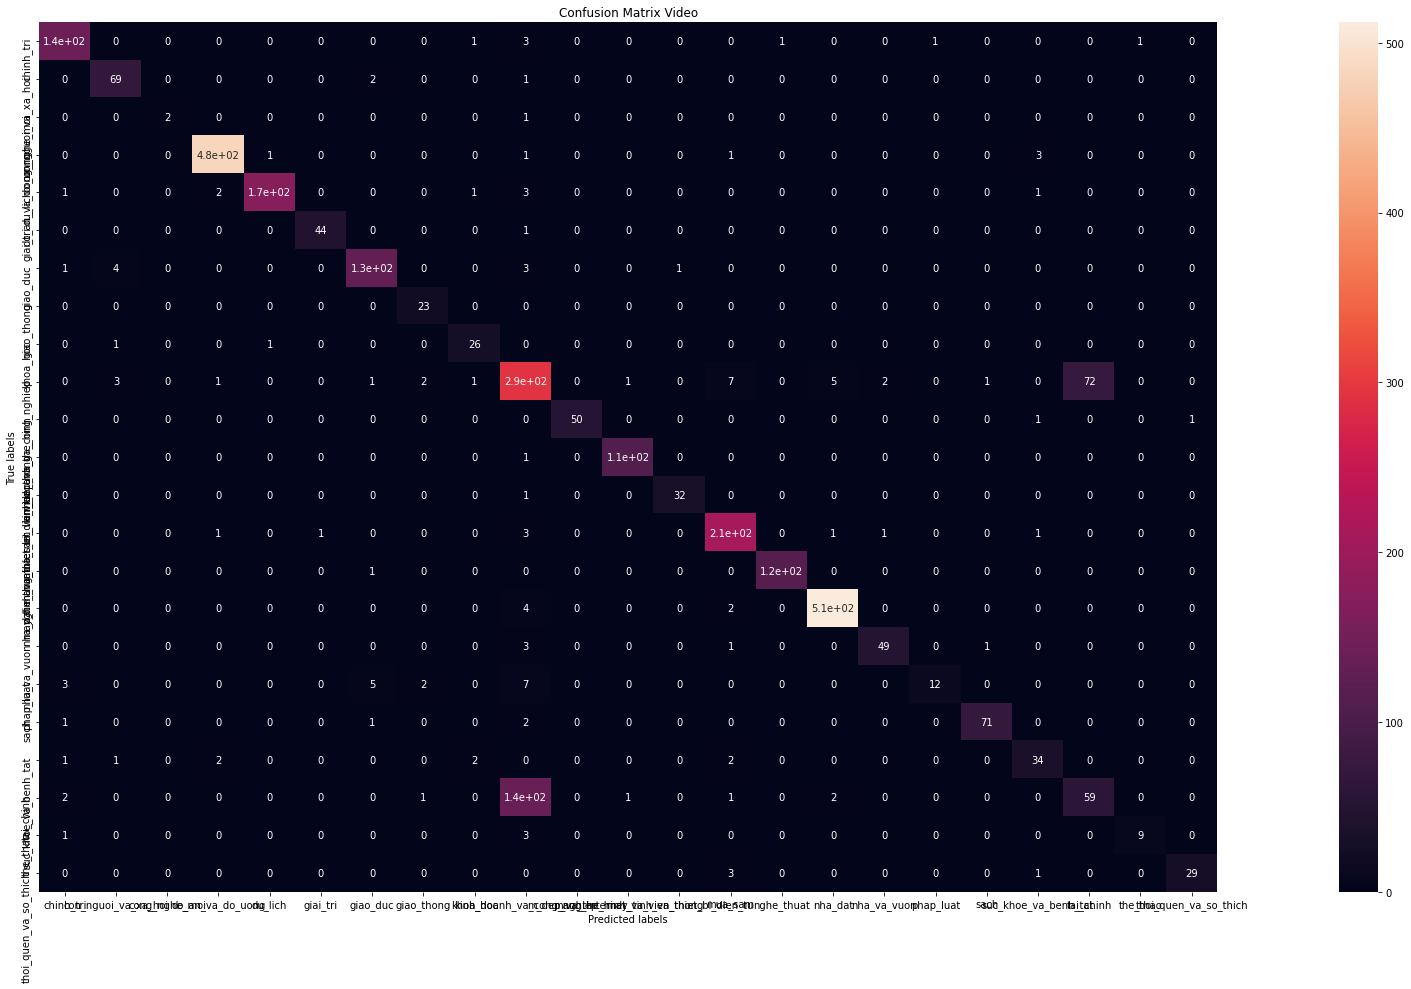

In [53]:
labels = []
for g in df.groupby('label'):
    labels.append(g[0])
labels.sort()  # sort abcd
cm = confusion_matrix(y_test, y_pred_test)
my_fig, (ax, my_cbar_ax) = plt.subplots(ncols=2, figsize=(24, 16),
                                        gridspec_kw={'width_ratios': [30, 1]})
sns.heatmap(cm, annot=True, ax = ax, cbar_ax = my_cbar_ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title(f'Confusion Matrix Video')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
plt.savefig(f'./tfidf.png')

In [54]:
# create df_train for report
df_train =pd.DataFrame()
df_train['label'] = y_train
df_train['text'] = X_train
df_train

,label,text
12663,do_an_va_do_uong,barista cà_phê học pha_chế hnaau học khóa pha_...
10553,do_an_va_do_uong,thử_nghiệm món cơm độc_đáo bữa tiệc nho_nhỏ gi...
14543,mang_internet_va_vien_thong,nạp tiền điện_thoại_di_động bình_thường khiếm_...
12675,kinh_doanh_va_cong_nghiep,dịch_vụ đặt_hàng trung_quốc k kg order taobao ...
5711,mua_sam,chân váy ren tinh_tế chất_lượng cực đẹp ms vr ...
...,...,...
5285,suc_khoe_va_benh_tat,bài_tập giúp đau lưng đau thần_kinh tọa cực_hữ...
14150,m_dep_va_the_hinh,tập gym nguyễn gym phổ tầng tiếc hùi_hụi giáo_...
5492,con_nguoi_va_xa_hoi,chung_thủy đàn_ông ngoại_tình tồn_tại cám_dỗ k...
860,tai_chinh,tổng_hợp hướng_dẫn thuế tncn thuế gtgt chính_s...


In [55]:
'''Correlation TF-IDF'''
terms = vect_obj.get_feature_names()
for i in df_train.groupby('label'):
    print(f'Correlation TF-IDF {i[0]}')
    i_vectorize = vect_obj.transform(i[1]['text'].values.astype('U'))
    sums = i_vectorize.sum(axis=0)
    rank_tf_idf = []
    for col, term in enumerate(terms):
        rank_tf_idf.append((term, sums[0, col]))
    ranking = pd.DataFrame(rank_tf_idf, columns=['term', 'rank'])
    ranking = ranking.sort_values(by=['rank'], ascending=False)
    print(ranking.head(25))

Correlation TF-IDF chinh_tri
             term       rank
1322     việt_nam  68.242645
798      nhân_dân  47.493613
918      quân_đội  43.482615
624          lính  39.527164
931          qđnd  35.699001
1288      tổ_quốc  31.758706
106      chiến_sĩ  31.534433
1012           ta  30.470098
1165   trung_quốc  29.524944
302       dân_tộc  28.693400
917          quân  28.132237
662     lực_lượng  26.980568
54         bảo_vệ  24.376279
108   chiến_tranh  24.224276
1468          đảo  23.298346
739           nam  23.226050
1321         việt  22.441372
1470     đất_nước  22.053969
1427           đi  21.975984
22           biển  19.797687
738            mỹ  18.916249
109     chiến_đấu  18.403917
788      nhiệm_vụ  18.143603
1445         đánh  16.584132
648       lịch_sử  16.487077
Correlation TF-IDF con_nguoi_va_xa_hoi
            term       rank
1441     đàn_ông  65.969811
893       phụ_nữ  44.955808
162        chồng  30.343887
474    hạnh_phúc  28.291678
1356          vợ  26.491986
1241    tì

            term        rank
441         hàng  116.059971
356          giá   82.909215
953         shop   70.819692
987     sản_phẩm   65.341029
1146   toàn_quốc   60.791576
277           da   58.234621
952         ship   57.555224
681          mua   44.491617
53      bảo_hành   43.308266
959         size   41.745873
1482    đặt_hàng   41.645952
348         giao   38.353903
599      liên_hệ   37.862895
686          màu   35.531086
1502     đồng_hồ   32.200269
1404        zalo   30.640882
993           sỉ   30.011836
191          com   29.011195
451         hãng   28.371036
186           cm   25.742613
151    chất_liệu   25.314910
152   chất_lượng   25.081185
161        chống   25.009779
713          mẫu   24.993174
674     miễn_phí   24.754996
Correlation TF-IDF nghe_thuat
              term       rank
963        sol_art  79.191746
749     nghệ_thuật  67.832550
962            sol  64.096104
1410       âm_nhạc  59.456155
603      liễu_giai  49.637446
238          cơ_sở  48.432648
6     

In [56]:
# create df_test for report
df_test =pd.DataFrame()
df_test['label'] = y_test
df_test['text'] = X_test
df_test

,label,text
2357,nha_dat,tỷ đẹp phú_lương hà_đông cạnh khu đô_thị thanh...
5528,mua_sam,iconstore vĩnh_phúc chuyên bán_buôn_bán_lẻ iph...
4647,tai_chinh,xã_hội tốt_đẹp thành_tiến giám_đốc công_ty dịc...
566,kinh_doanh_va_cong_nghiep,ý_tưởng đọc báo tờ viết anh_chàng du_học_sinh ...
9481,giao_duc,quản_lý gd đt nghề hai giành thông_tư cgd hai ...
...,...,...
12139,do_an_va_do_uong,nằm nhân phô mai chảy món bánh hot nằm vỏ bánh...
13595,kinh_doanh_va_cong_nghiep,tài_chính kinh_doanh tối https www youtube com...
11860,con_nguoi_va_xa_hoi,đàn_ông ngoại_tình tình_dục trao trọn tình_cảm...
5334,tai_chinh,ace mẫu_hóa_đơn công_ty_mẹ phát_hành chi_nhánh...


In [57]:
'''Correlation TF-IDF'''
terms = vect_obj.get_feature_names()
for i in df_test.groupby('label'):
    print(f'Correlation TF-IDF {i[0]}')
    i_vectorize = vect_obj.transform(i[1]['text'].values.astype('U'))
    sums = i_vectorize.sum(axis=0)
    rank_tf_idf = []
    for col, term in enumerate(terms):
        rank_tf_idf.append((term, sums[0, col]))
    ranking = pd.DataFrame(rank_tf_idf, columns=['term', 'rank'])
    ranking = ranking.sort_values(by=['rank'], ascending=False)
    print(ranking.head(25))

Correlation TF-IDF chinh_tri
             term       rank
1322     việt_nam  14.385075
624          lính   9.525435
798      nhân_dân   8.634977
917          quân   8.476393
918      quân_đội   7.984227
662     lực_lượng   7.151697
106      chiến_sĩ   6.898846
931          qđnd   6.789102
1470     đất_nước   6.637179
1288      tổ_quốc   6.608065
1165   trung_quốc   6.359012
1445         đánh   6.159199
1468          đảo   5.865769
1012           ta   5.740724
739           nam   5.492260
1427           đi   5.204438
738            mỹ   5.192978
109     chiến_đấu   5.052127
302       dân_tộc   4.976657
788      nhiệm_vụ   4.868067
299           dân   4.732220
54         bảo_vệ   4.676822
108   chiến_tranh   4.657403
1321         việt   4.494723
371    giải_phóng   4.295492
Correlation TF-IDF con_nguoi_va_xa_hoi
            term       rank
1441     đàn_ông  12.196133
893       phụ_nữ   9.994229
1356          vợ   8.062941
162        chồng   7.961696
474    hạnh_phúc   7.078967
1400      

## Các kết quả thử nghiệm khác

In [59]:
model_load = pickle.load(open('./model/SVC_clean_1212.pkl', 'rb'))

###  test predict_proba
ý tưởng: với các dữ liệu mà có 2 xác suất dự đoán cao nhất là tai_chinh or kinh_doanh thì sẽ phân lớp lại

In [60]:
y_pred_test_pro = model_load.predict_proba(X_test_trans)
y_pred_train_pro = model_load.predict_proba(X_train_trans)

In [64]:
# lấy 2 giá trị proba cao nhất
n = 2
best_n = np.argsort(y_pred_test_pro, axis=1)[:,-n:]
best_n.shape

(3012, 2)

In [62]:
best2labels_ = model_load.classes_[best_n]
best2labels_

array([['nha_va_vuon', 'nha_dat'],
       ['mang_internet_va_vien_thong', 'mua_sam'],
       ['tai_chinh', 'kinh_doanh_va_cong_nghiep'],
       ...,
       ['khoa_hoc', 'con_nguoi_va_xa_hoi'],
       ['phap_luat', 'kinh_doanh_va_cong_nghiep'],
       ['kinh_doanh_va_cong_nghiep', 'sach']], dtype=object)

In [66]:
df_ambiguous = pd.DataFrame() # chứa các dữ liệu mà dự đoán là tai_chinh or kinh_doanh

In [67]:
text_ambiguous = []
label_ambiguous = []
for idx, label in enumerate(y_pred_test_pro):
    ambiguous_kd_tc = 0
    is_ambiguous = False
    if(best2labels_[idx][0] == 'tai_chinh' or best2labels_[idx][0] == 'kinh_doanh_va_cong_nghiep'):
        ambiguous_kd_tc +=1
    if(best2labels_[idx][1] == 'tai_chinh' or best2labels_[idx][1] == 'kinh_doanh_va_cong_nghiep'):
        ambiguous_kd_tc +=1
    if(ambiguous_kd_tc == 2):
        is_ambiguous = True
        
    if(is_ambiguous):
        text_ambiguous.append(X_test.iloc[idx])
        label_ambiguous.append(y_test.iloc[idx])

In [68]:
df_ambiguous['text'] = text_ambiguous
df_ambiguous['label'] = label_ambiguous

In [69]:
df_ambiguous

,text,label
0,xã_hội tốt_đẹp thành_tiến giám_đốc công_ty dịc...,tai_chinh
1,ý_tưởng đọc báo tờ viết anh_chàng du_học_sinh ...,kinh_doanh_va_cong_nghiep
2,café ceo amazon mặt google làm_việc mơ_ước thế...,tai_chinh
3,sửa_đổi thủ_tục quyết_toán thuế tndn thông_báo...,tai_chinh
4,văn_phòng đại_diện nộp lệ_phí môn_bài chinhphu...,kinh_doanh_va_cong_nghiep
...,...,...
530,thông_minh che dấu đi thông_minh chương_trình ...,kinh_doanh_va_cong_nghiep
531,tài_chính kinh_doanh tối quá_tải atm tết ngân_...,tai_chinh
532,chính_phủ ban_hành nghị_định nđ cp sửa_đổi ngh...,tai_chinh
533,chính_sách hưởng bảo_hiểm xã_hội lao_động lao_...,tai_chinh


### K-nearest neighbors

In [70]:
from sklearn.neighbors import KNeighborsClassifier

In [71]:
knn = KNeighborsClassifier(n_neighbors=100)

####  df kinhdoanh, taichinh for knn

In [72]:
df_kd = df_train[df_train['label'] == 'kinh_doanh_va_cong_nghiep']
df_tc = df_train[df_train['label'] == 'tai_chinh']
df_knn = pd.concat([df_kd, df_tc])
df_knn

,label,text
12675,kinh_doanh_va_cong_nghiep,dịch_vụ đặt_hàng trung_quốc k kg order taobao ...
1070,kinh_doanh_va_cong_nghiep,ceo chìa khóa thành_công kinh_doanh đa ngành d...
13655,kinh_doanh_va_cong_nghiep,khởi lập công_cuộc kinh_doanh mở_rộng phạm_vi ...
6948,kinh_doanh_va_cong_nghiep,tuyển_dụng tuyển kế_toán_viên đào_tạo kinh_ngh...
7476,kinh_doanh_va_cong_nghiep,trân_trọng giới_thiệu ceo chương_trình đinh vă...
...,...,...
8710,tai_chinh,làm_việc nghỉ thai_sản đóng bhxh công_văn bhxh...
10663,tai_chinh,thông_tin công_cụ dụng_cụ tài_sản cố_định phân...
3594,tai_chinh,bidv ký hợp_đồng liên_kết hùng lê lễ ký_kết di...
4727,tai_chinh,tài_chính kinh_doanh http vtv vn video clip ta...


In [73]:
X_train_knn = df_knn['text']
y_train_knn = df_knn['label']

X_train_knn_trans = vect_obj.transform(X_train_knn)

In [80]:
# knn.fit(X_train_knn_trans, y_train_knn) 
knn.fit(X_train_knn_trans, y_train_knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=100, p=2,
                     weights='uniform')

In [81]:
X_test_amb = df_ambiguous['text']
X_test_amb_trans = vect_obj.transform(X_test_amb)

y_pred_amb = knn.predict(X_test_amb_trans)

In [82]:
df_ambiguous['predict_knn'] = y_pred_amb

In [83]:
count_exac = 0
for i in range(len(df_ambiguous)):
    if(df_ambiguous['label'].iloc[i] == df_ambiguous['predict_knn'].iloc[i]):
        count_exac +=1
count_exac

341

In [84]:
# accuracy
print('accuracy: ', count_exac/X_test_amb.shape[0])

accuracy:  0.6373831775700934
